# Networkx

# import

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 1) Tracer un graph

In [6]:
G = nx.Graph()
G.add_edges_from([("A", "B"), ("A", "C"), ("B", "D"), ("C", "D"), ("C", "E")])


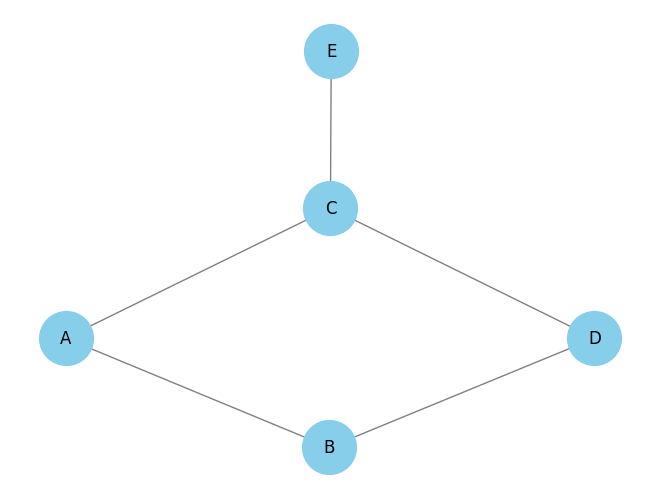

In [7]:
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500)
plt.show()

<Figure size 800x600 with 0 Axes>

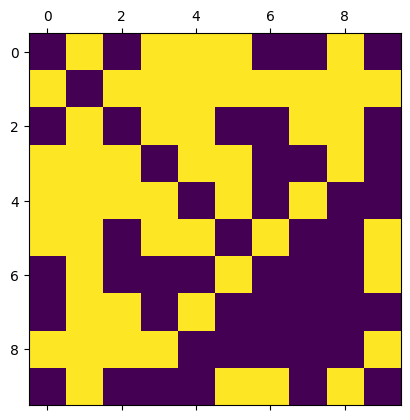

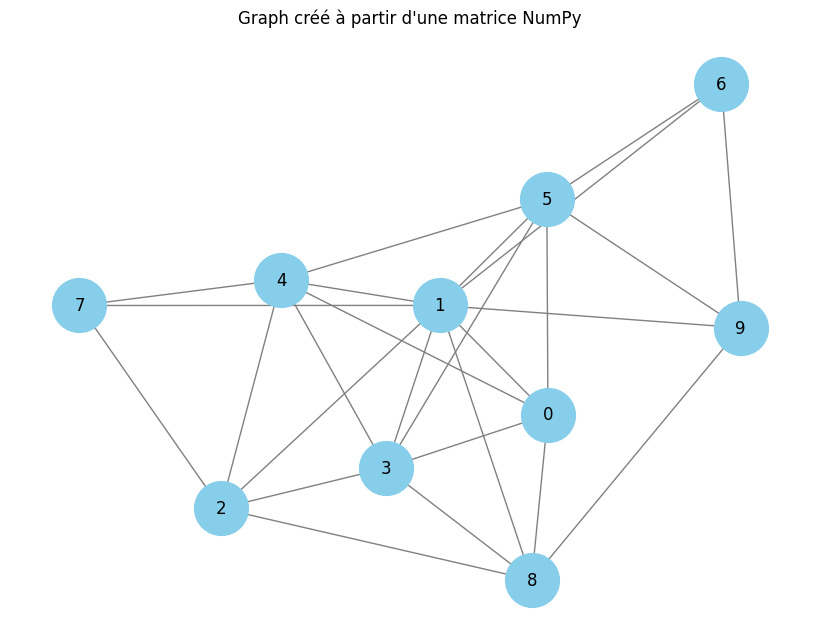

Matrice d'adjacence :
[[0 1 0 1 1 1 0 0 1 0]
 [1 0 1 1 1 1 1 1 1 1]
 [0 1 0 1 1 0 0 1 1 0]
 [1 1 1 0 1 1 0 0 1 0]
 [1 1 1 1 0 1 0 1 0 0]
 [1 1 0 1 1 0 1 0 0 1]
 [0 1 0 0 0 1 0 0 0 1]
 [0 1 1 0 1 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 1]
 [0 1 0 0 0 1 1 0 1 0]]


In [ ]:
size = 10
adj_matrix = np.random.randint(0, 2, size=(size, size))

adj_matrix = np.triu(adj_matrix, 1)  # Mettre des zéros dans la partie inférieure
adj_matrix = adj_matrix + adj_matrix.T  # Symétriser

plt.figure(figsize=(8, 6))
plt.matshow(adj_matrix)
plt.show()

G = nx.from_numpy_array(adj_matrix)

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500)
plt.title("Graph créé à partir d'une matrice NumPy")
plt.show()


# 2) Caractérisation graph

In [46]:
G = nx.Graph()
G.add_edges_from([("A", "B"), ("A", "C"), ("B", "D"), ("C", "D"), ("C", "E")])

print("Degrés:", dict(G.degree()))
print("Degré moyen:", np.mean([d for n, d in G.degree()]))
print("Centralité (degré):", nx.degree_centrality(G))
print("Clustering global:", nx.average_clustering(G))

Degrés: {'A': 2, 'B': 2, 'C': 3, 'D': 2, 'E': 1}
Degré moyen: 2.0
Centralité (degré): {'A': 0.5, 'B': 0.5, 'C': 0.75, 'D': 0.5, 'E': 0.25}
Clustering global: 0.0


# 3) karate club example

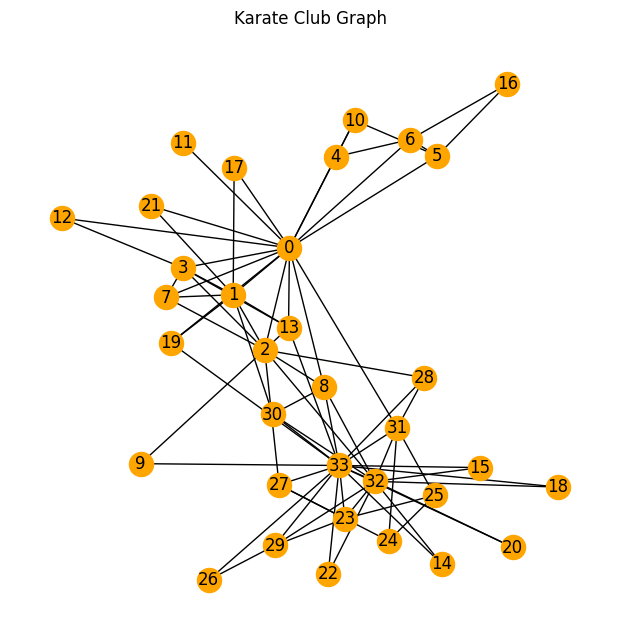

In [9]:
karate = nx.karate_club_graph()
plt.figure(figsize=(6, 6))
nx.draw(karate, with_labels=True, node_color='orange')
plt.title("Karate Club Graph")
plt.show()

In [ ]:
communities = nx.algorithms.community.greedy_modularity_communities(karate)
print("Nombre de communautés:", len(communities))

Nombre de communautés: 3


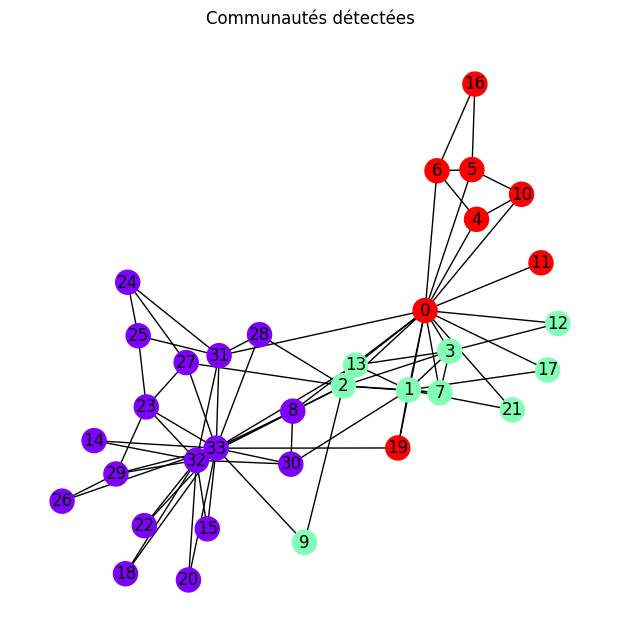

In [11]:
color_map = [0] * karate.number_of_nodes()
for i, comm in enumerate(communities):
    for node in comm:
        color_map[node] = i

plt.figure(figsize=(6, 6))
nx.draw(karate, node_color=color_map, with_labels=True, cmap=plt.cm.rainbow)
plt.title("Communautés détectées")
plt.show()

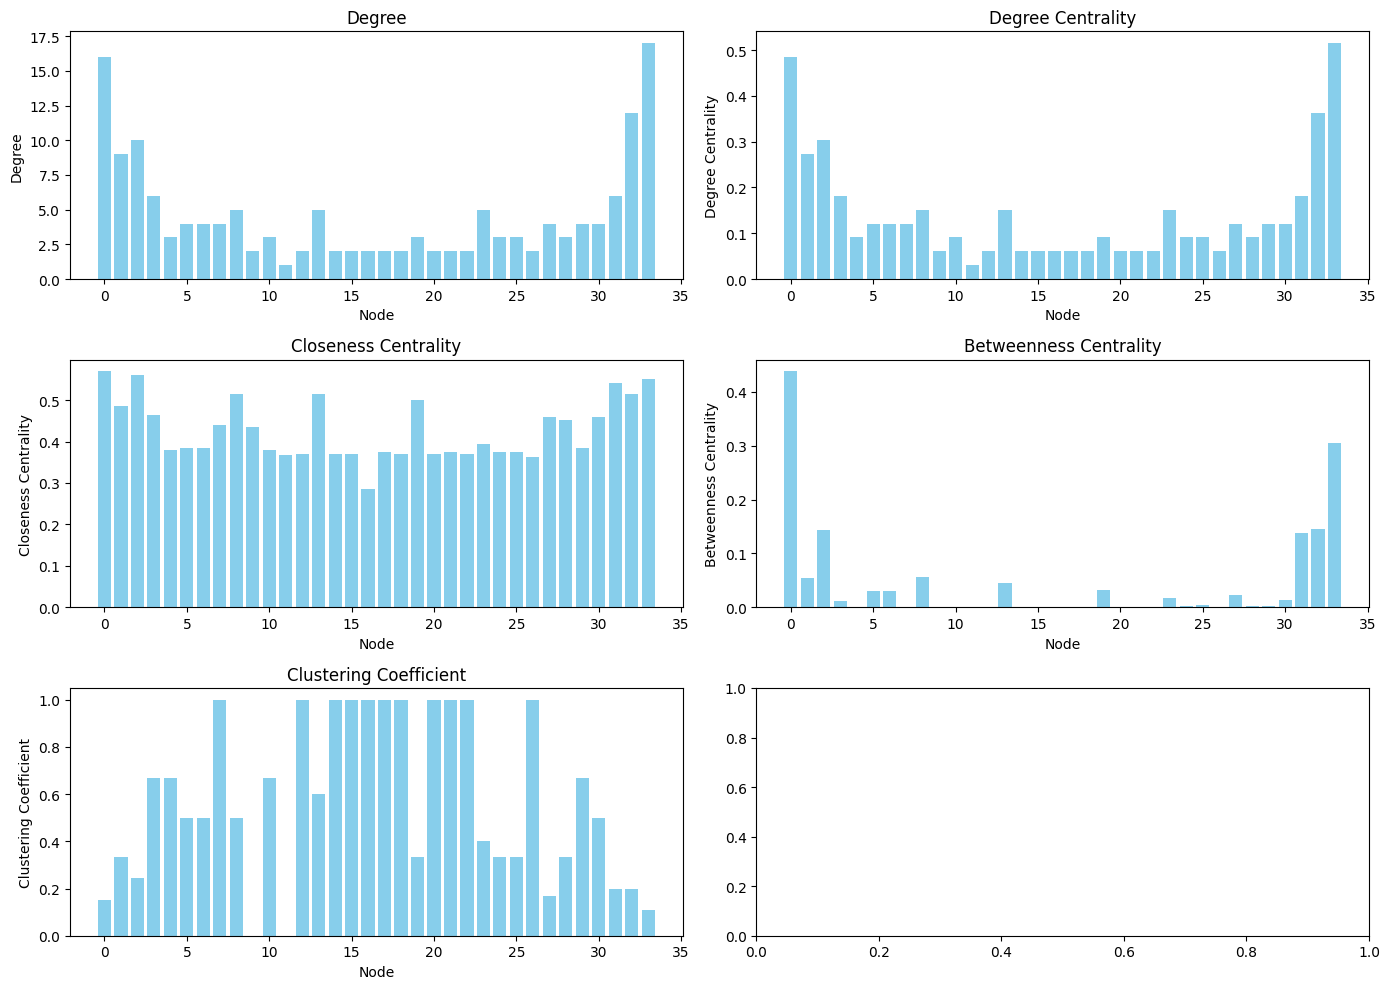

In [38]:

# Calcul des métriques
degree = dict(G.degree())
degree_centrality = nx.degree_centrality(karate)
closeness_centrality = nx.closeness_centrality(karate)
betweenness_centrality = nx.betweenness_centrality(karate)
clustering = nx.clustering(karate)

# Affichage des métriques pour tous les noeuds
metrics = {
    'Degree': degree,
    'Degree Centrality': degree_centrality,
    'Closeness Centrality': closeness_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Clustering Coefficient': clustering
}

# Tracer les métriques
fig, axes = plt.subplots(3, 2, figsize=(14, 10))

# Mettre les données sous forme de liste de valeurs triées
sorted_metrics = {metric: sorted(values.items(), key=lambda x: x[1], reverse=True) for metric, values in metrics.items()}

# Tracer chaque métrique
for i, (metric, values) in enumerate(sorted_metrics.items()):
    ax = axes[i // 2, i % 2]
    nodes, values = zip(*values)
    ax.bar(nodes, values, color='skyblue')
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xlabel("Node")

plt.tight_layout()
plt.show()


# 4) small world VS random

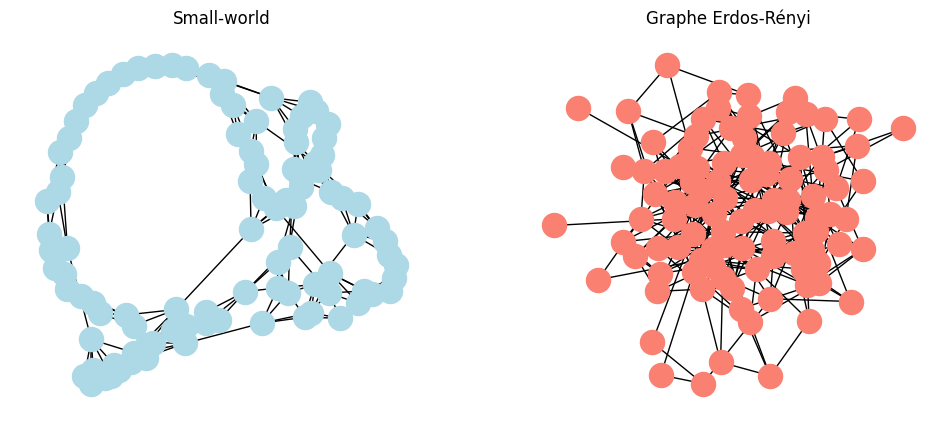

In [41]:
# Création des graphes
n = 100
k = 6
p = 0.05

small_world = nx.watts_strogatz_graph(n=n, k=k, p=p)
random_graph = nx.erdos_renyi_graph(n=n, p=k/(n-1))

plt.figure(figsize=(12, 5))
plt.subplot(121)
nx.draw(small_world, node_color='lightblue', with_labels=False)
plt.title("Small-world")

plt.subplot(122)
nx.draw(random_graph, node_color='salmon', with_labels=False)
plt.title("Graphe Erdos-Rényi")
plt.show()

In [42]:
def characterize_graph(G):
    clustering = nx.average_clustering(G)
    try:
        path_length = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        path_length = np.nan
    return clustering, path_length

cl_sw, pl_sw = characterize_graph(small_world)
cl_rand, pl_rand = characterize_graph(random_graph)

print("Small-World Graph:")
print(f"  Clustering: {cl_sw:.3f}, Avg Path Length: {pl_sw:.3f}")

print("\nRandom Graph:")
print(f"  Clustering: {cl_rand:.3f}, Avg Path Length: {pl_rand:.3f}")

Small-World Graph:
  Clustering: 0.533, Avg Path Length: 4.798

Random Graph:
  Clustering: 0.042, Avg Path Length: 2.764
